In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Data

## Roles With Descriptions

In [3]:
# load in data 
data_descriptions = pd.read_csv("roles_descriptions.csv") 
descriptions_df = pd.DataFrame(data_descriptions)
descriptions_df

,cluster_name,cluster_percentage
0,Accounting and Finance Professionals,7.95
1,Administrative Support and HR,10.11
2,Care and Education Support,13.97
3,Clinical Care Professionals,4.09
4,Engineering and Quality Assurance,10.76
5,Operations and Management Professionals,6.36
6,Retail and Hospitality Services,7.12
7,Sales and Marketing Professionals,21.80
8,Software and IT Professionals,14.11
9,Technicians,3.72


## Roles Without Descriptions

In [4]:
# load in data 
data_no_descriptions = pd.read_csv("roles_no_descriptions.csv") 
no_descriptions_df = pd.DataFrame(data_no_descriptions)
no_descriptions_df 

,cluster_name,cluster_percentage
0,Accounting and Finance Professionals,10.85
1,Administrative Support and HR,10.67
2,Care and Education Support,11.88
3,Clinical Care Professionals,5.75
4,Engineering and Quality Assurance,8.25
5,Operations and Management Professionals,6.49
6,Retail and Hospitality Services,6.39
7,Sales and Marketing Professionals,21.35
8,Software and IT Professionals,15.89
9,Technicians,2.48


## Years and Description Percentages

In [5]:
# Load in the 2025 data 
description_perc = pd.read_csv("Years and Descriptions_2025_data.csv")
description_perc_df = pd.DataFrame(description_perc)
description_perc_df = description_perc_df.iloc[:-1]
description_perc_df = description_perc_df.astype({'years' : int})
description_perc_df

,years,description_percentage
0,1950,31
1,1951,14
2,1952,31
3,1953,33
4,1954,33
...,...,...
71,2021,34
72,2022,32
73,2023,30
74,2024,26


In [6]:
# Load in the 2022 data 
description_22perc = pd.read_csv("Years and Descriptions_2022_data.csv")
description_22perc_df = pd.DataFrame(description_22perc)
description_22perc_df = description_22perc_df.astype({'years' : int})
description_22perc_df

,years,description_percentage
0,1950,32
1,1951,19
2,1952,33
3,1953,36
4,1954,35
...,...,...
68,2018,39
69,2019,36
70,2020,33
71,2021,25


In [7]:
# load in data containing same positions between 2022 and 2025 db 
d_per_22_25 = pd.read_csv("2022_2025_matched_positions_of_years_and_descriptions.csv")
d_per_22_25_df = pd.DataFrame(d_per_22_25)
d_per_22_25_df

,years,description_percentage_22,description_percentage_25
0,1950,33.48,33.47
1,1951,21.80,21.74
2,1952,35.43,35.46
3,1953,36.74,36.71
4,1954,36.65,36.65
...,...,...,...
68,2018,38.09,40.59
69,2019,35.23,38.31
70,2020,31.54,35.73
71,2021,23.73,31.04


## Roles, Years, and Description Percentages

In [8]:
# Load in the 2025 data 
role_description_perc = pd.read_csv("roles_years_descriptions_2025_data.csv")
role_description_perc_df = pd.DataFrame(role_description_perc)
role_description_perc_df

,years,clusters,description_percentage
0,2016,Accounting and Finance Professionals,42.26
1,2016,Administrative Support and HR,42.71
2,2016,Care and Education Support,47.71
3,2016,Clinical Care Professionals,38.40
4,2016,Engineering and Quality Assurance,48.26
...,...,...,...
95,2025,Operations and Management Professionals,15.86
96,2025,Retail and Hospitality Services,16.52
97,2025,Sales and Marketing Professionals,21.50
98,2025,Software and IT Professionals,18.12


In [9]:
s = sorted((role_description_perc_df.clusters).unique())
s[np.argmin(role_description_perc_df.loc[role_description_perc_df['years'] == 2016, 'description_percentage'].values - role_description_perc_df.loc[role_description_perc_df['years'] == 2025, 'description_percentage'].values)]

'Care and Education Support'

## AI Classifications per Year

In [10]:
# load in 2025 database data
AI_class = pd.read_csv("AI_classification_per_year.csv")
AI_class_df = pd.DataFrame(AI_class)
AI_class_df = AI_class_df.iloc[:-1].astype({"years": int})
AI_class_df

,years,AI_perc,not_AI_perc
0,1950,0.0381,99.9619
1,1951,0.0282,99.9718
2,1952,0.0246,99.9754
3,1953,0.0315,99.9685
4,1954,0.0600,99.9400
...,...,...,...
71,2021,0.6184,99.3816
72,2022,0.6780,99.3220
73,2023,0.8852,99.1148
74,2024,1.2018,98.7982


In [11]:
# load in 2022 database data
AI_class_22 = pd.read_csv("AI_classification_per_year_22.csv")
AI_class_22_df = pd.DataFrame(AI_class_22)
AI_class_22_df = AI_class_22_df.astype({"years": int})
AI_class_22_df

,years,AI_perc,not_AI_perc
0,1950,0.0217,99.9783
1,1951,0.0737,99.9263
2,1952,0.0854,99.9146
3,1953,0.0222,99.9778
4,1954,0.0443,99.9557
...,...,...,...
68,2018,0.5187,99.4813
69,2019,0.5683,99.4317
70,2020,0.6132,99.3868
71,2021,0.5318,99.4682


In [12]:
# load in data pertaining to same positions held across 2022 and 2025 db
AI_class_22_25 = pd.read_csv("2022_2025_matched_positions_of_AIclass_and_years.csv")
AI_class_22_25_df = pd.DataFrame(AI_class_22_25)
AI_class_22_25_df

,years,AI_perc_22,AI_perc_25
0,1950,0.0243,0.0243
1,1951,0.0896,0.0896
2,1952,0.0954,0.0954
3,1953,0.0245,0.0326
4,1954,0.0493,0.0493
...,...,...,...
68,2018,0.4732,0.5257
69,2019,0.5135,0.5823
70,2020,0.5454,0.6482
71,2021,0.4596,0.6451


# Plots

## Representations of Roles in Positions with and without Descriptions

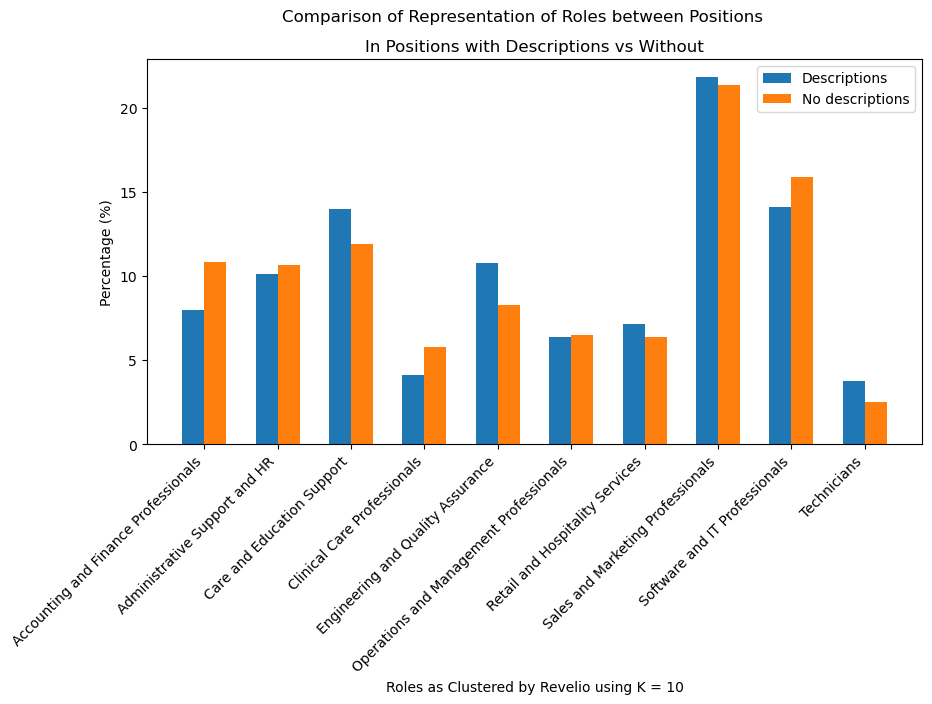

In [13]:
# Source: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# Data on X-axis
N = len(descriptions_df)
# Specify the values of blue bars (height)
blue_bar = descriptions_df.cluster_percentage
# Specify the values of orange bars (height)
orange_bar = no_descriptions_df.cluster_percentage

# Position of bars on x-axis
ind = np.arange(N) 

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Descriptions')
plt.bar(ind + width, orange_bar, width, label='No descriptions')

plt.xlabel('Roles as Clustered by Revelio using K = 10')
plt.ylabel('Percentage (%)')
plt.title('In Positions with Descriptions vs Without')
plt.suptitle('Comparison of Representation of Roles between Positions')

# xticks()
plt.xticks(ind + width / 2, descriptions_df.cluster_name, rotation = 45, ha = "right")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Change in % of Descriptions contained in Positions over the Years 

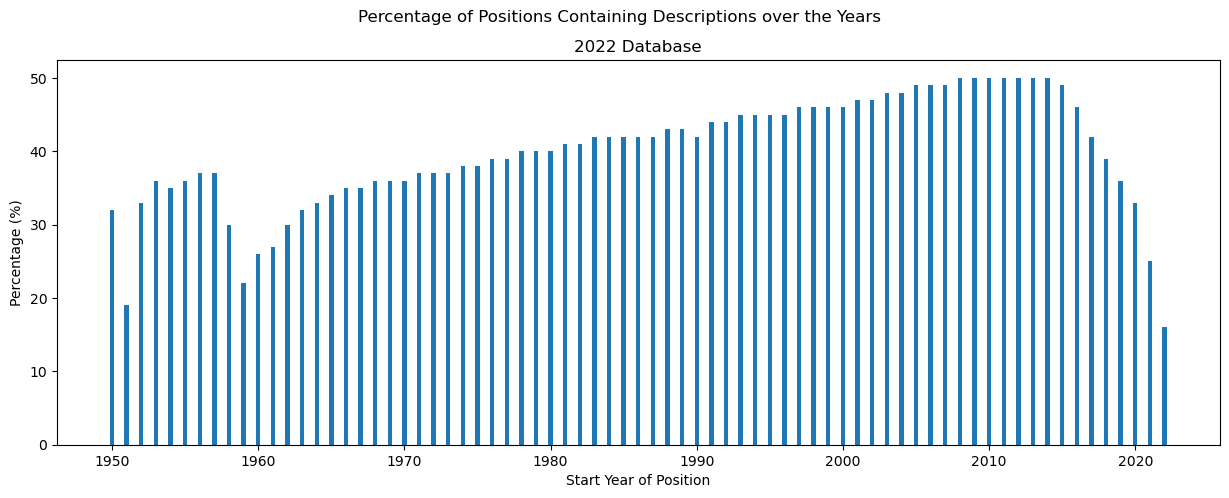

In [16]:
# 2022

# Figure size
plt.figure(figsize=(15,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(description_22perc_df.years, description_22perc_df.description_percentage , width)

plt.xlabel('Start Year of Position')
plt.ylabel('Percentage (%)')
plt.suptitle('Percentage of Positions Containing Descriptions over the Years')
plt.title('2022 Database');

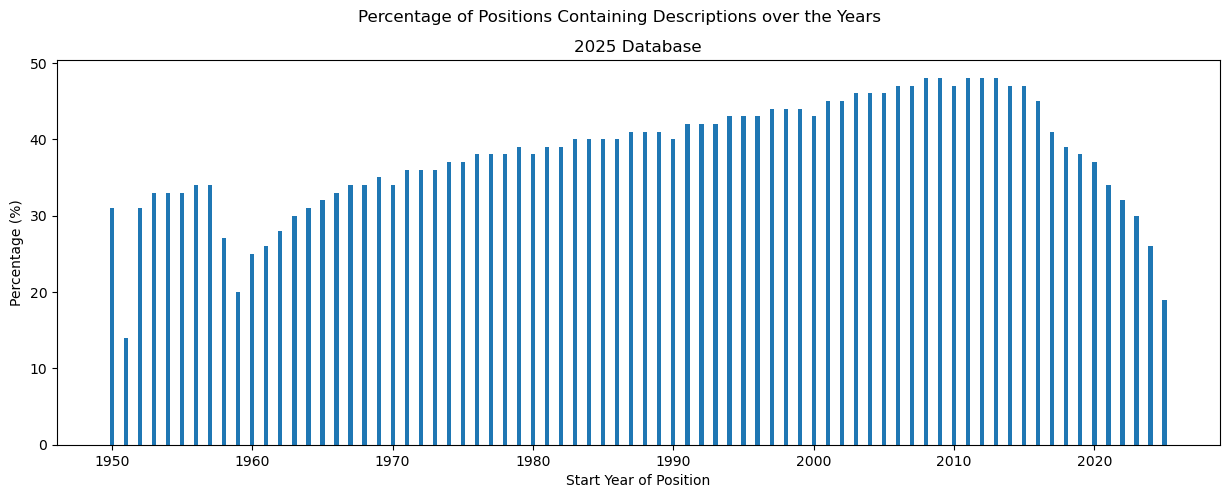

In [17]:
# 2025

# Figure size
plt.figure(figsize=(15,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(description_perc_df.years, description_perc_df.description_percentage , width)

plt.xlabel('Start Year of Position')
plt.ylabel('Percentage (%)')
plt.suptitle('Percentage of Positions Containing Descriptions over the Years')
plt.title('2025 Database');

In [19]:
ticks = [0, 10, 20, 30, 40, 50, 60, 70]
tick_labels = [d_per_22_25.years.iloc[10*i] for i in range(8)]

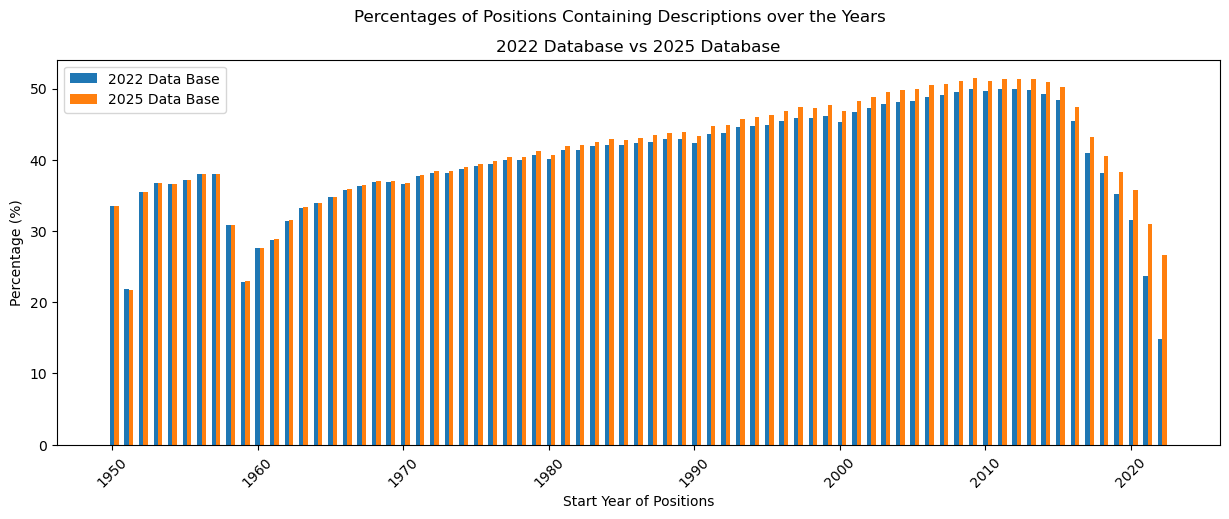

In [20]:
N = len(d_per_22_25_df)
# Specify the values of blue bars (height)
blue_bar = d_per_22_25_df.description_percentage_22
# Specify the values of orange bars (height)
orange_bar = d_per_22_25_df.description_percentage_25

# Position of bars on x-axis
ind = np.arange(N) 

# Figure size
plt.figure(figsize=(15,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='2022 Data Base')
plt.bar(ind + width, orange_bar, width, label='2025 Data Base')

plt.xlabel('Start Year of Positions')
plt.ylabel('Percentage (%)')
plt.title('2022 Database vs 2025 Database')
plt.suptitle('Percentages of Positions Containing Descriptions over the Years')

# xticks()
plt.xticks(ticks = ticks, labels = tick_labels, rotation = 45, ha = "center")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Representations of Roles with Descriptions by Year

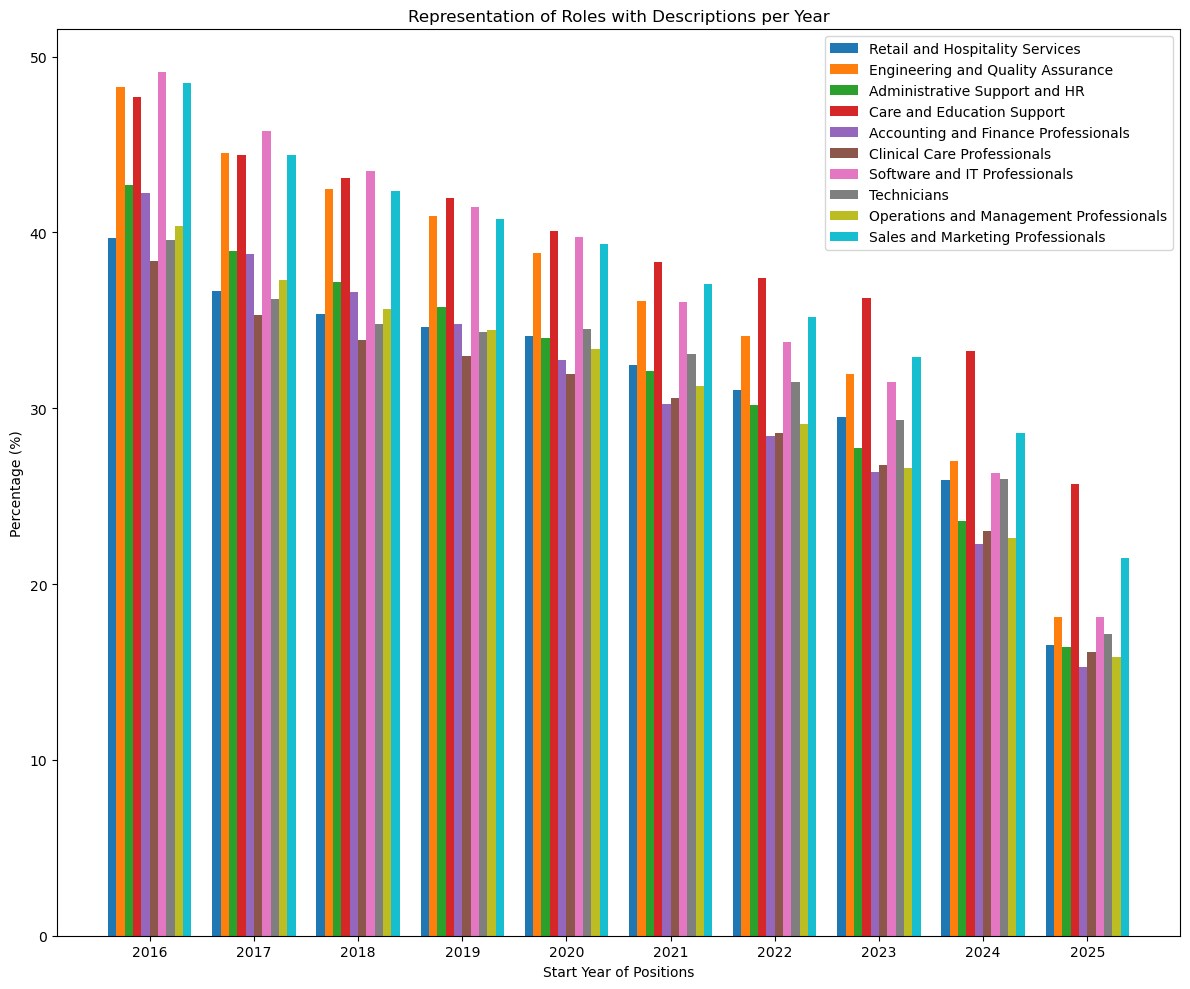

In [21]:
years = set(role_description_perc_df['years'])
roles = set(role_description_perc_df['clusters'])

N = len(years)
M = len(roles)
ind = np.arange(N)  # x positions for years
width = 0.08  # width of each bar

plt.figure(figsize=(12,10))

for i, role in enumerate(roles):
    # Extract percentages for this role across all years
    perc = role_description_perc_df.loc[role_description_perc_df['clusters'] == role].description_percentage
    
    plt.bar(ind + i*width, perc, width, label=role)

# Center xticks under clusters
plt.xticks(ind + width*(M-1)/2, years)
plt.xlabel('Start Year of Positions')
plt.ylabel('Percentage (%)')
plt.title('Representation of Roles with Descriptions per Year')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## AI Clasification per Year

Text(0.5, 0.98, 'Percentage of Positions Flagged for AI over the Years')

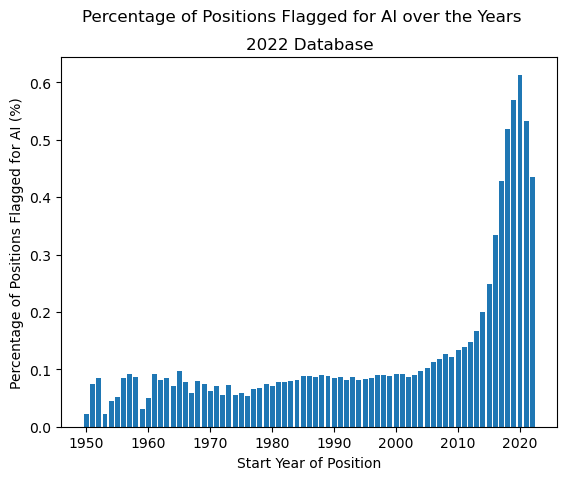

In [24]:
years_22 = AI_class_22_df.years
AI_22 = AI_class_22_df.AI_perc

plt.bar(years_22, AI_22)
plt.xlabel("Start Year of Position")
plt.ylabel("Percentage of Positions Flagged for AI (%)")
plt.title("2022 Database");
plt.suptitle("Percentage of Positions Flagged for AI over the Years")

Text(0.5, 0.98, 'Percentage of Positions Flagged for AI over the Years')

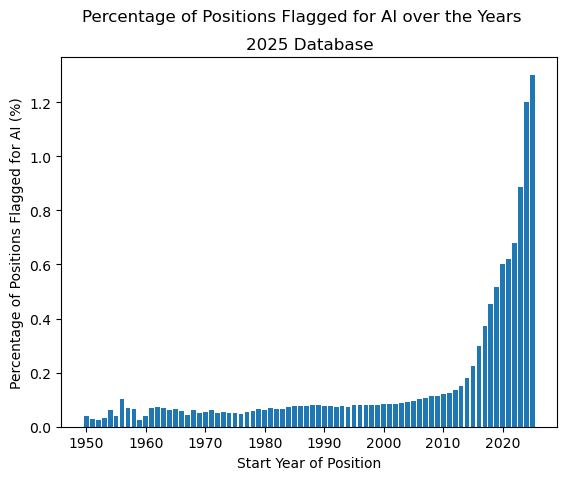

In [22]:
years = AI_class_df.years
AI = AI_class_df.AI_perc

plt.bar(years, AI)
plt.xlabel("Start Year of Position")
plt.ylabel("Percentage of Positions Flagged for AI (%)")
plt.title("2025 Database");
plt.suptitle("Percentage of Positions Flagged for AI over the Years")


Text(0.5, 0.98, 'Percentage of Positions Not Flagged for AI over the Years')

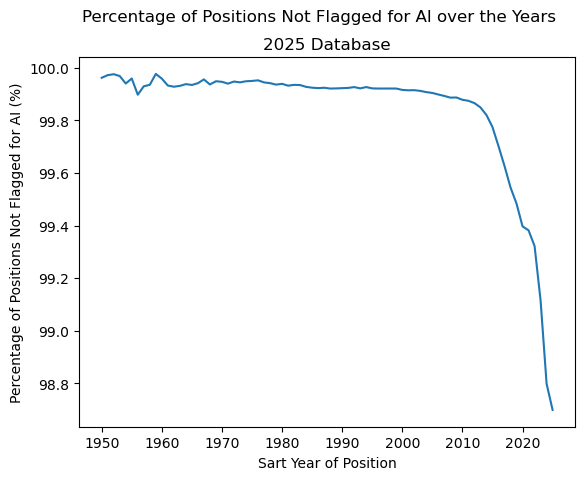

In [23]:
years = AI_class_df.years
not_AI = AI_class_df.not_AI_perc

plt.plot(years, not_AI)
plt.xlabel("Sart Year of Position")
plt.ylabel("Percentage of Positions Not Flagged for AI (%)")
plt.title("2025 Database")
plt.suptitle("Percentage of Positions Not Flagged for AI over the Years")

In [17]:
ticks = [0, 10, 20, 30, 40, 50, 60, 70]
tick_labels = [AI_class_22_25.years.iloc[10*i] for i in range(8)]

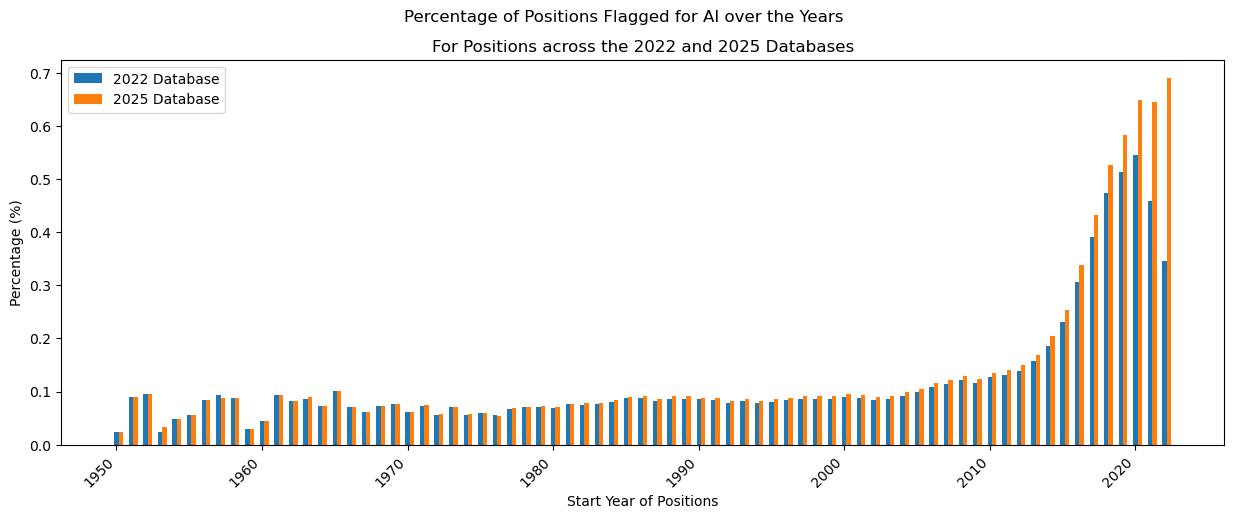

In [25]:
N = len(AI_class_22_25)

ind = np.arange(N)

blue_bar = AI_class_22_25.AI_perc_22
orange_bar = AI_class_22_25.AI_perc_25 

width = 0.3

plt.figure(figsize = (15, 5))

plt.bar(ind, blue_bar, width, label = "2022 Database")
plt.bar(ind + width, orange_bar, width, label = "2025 Database")

plt.xticks(ticks, tick_labels, rotation = 45, ha = 'right')
plt.xlabel("Start Year of Positions") 
plt.ylabel("Percentage (%)")
plt.suptitle("Percentage of Positions Flagged for AI over the Years")
plt.title("For Positions across the 2022 and 2025 Databases")

plt.legend(loc = 'best')
plt.show()